# <span style="color:red"> Lecture 4
---

### Abstract
In this lecture, we implement a Molecular-Dynamics code to simulate the evolution over time of a system of $108$ particles in an isolated system (microcanonical ensemble). The task is to compute observables quantities (in reduced units) such as the total internal energy per particle $E/N$, the potential energy per particle $U/N$, the kinetic energy per particle $K/N$,  the temperature $T$ and the pressure $P$, in the three stages of matter, solid, liquid and gas.

First of all, in order to measure the above mentioned quantities, we should equilibrate the system, i.e. the measured temperature $T$ must be equal to a target temperature $T_{target}$ at which we want to study the system. In order to do so, we should perform an initial simulation with a temperature $T_{sim}$ which brings the system measured $T$ as close as possible to the desired value (i.e. $T_{target}$).

After some testing, the chosen values for $T_{sim}$ are: $T_{sim} = 1.54$ for the solid phase ($T_{target} = 0.8$), $T_{sim} = 1.97$ for the liquid phase ($T_{target} = 1.1$) and finally $T_{sim} = 0.96$ for the gaseous phase ($T_{target} = 1.2$).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Exercise 04.2

In [2]:
states = ["solid", "liquid", "gas"]
dfs= {}

for state in states:
    dfs[state] = {
        "ekin":  pd.read_csv(f"../data/MD_simulation/{state}_ekin.dat", sep="\t"),
        "epot":  pd.read_csv(f"../data/MD_simulation/{state}_epot.dat", sep="\t"),
        "etot":  pd.read_csv(f"../data/MD_simulation/{state}_etot.dat", sep="\t"),
        "temp":  pd.read_csv(f"../data/MD_simulation/{state}_temp.dat", sep="\t"),
        "press": pd.read_csv(f"../data/MD_simulation/{state}_press.dat", sep="\t")
    }

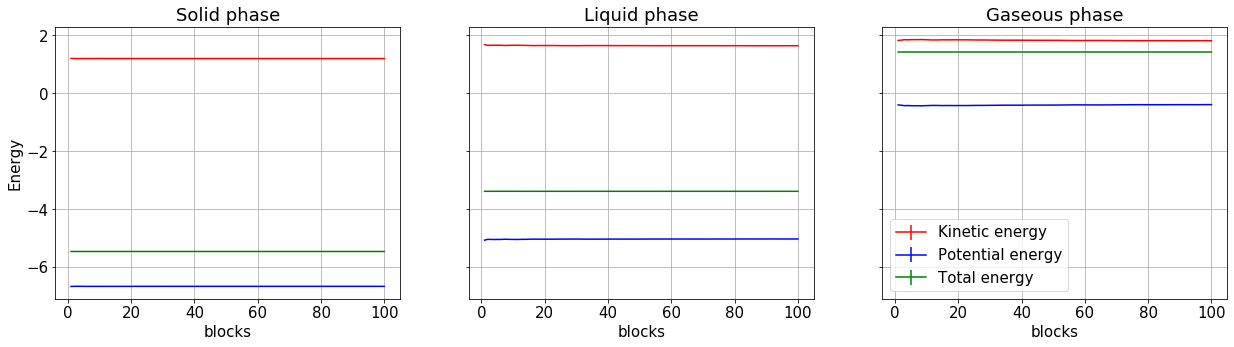

In [3]:
blocks = dfs["solid"]["ekin"]["Block"]
titles = ["Solid", "Liquid", "Gaseous"]

plt.rcParams.update({'font.size':15})
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(21, 5), nrows=1, ncols=3, sharey=True)
axs = [ax1, ax2, ax3]

for i in range(3):
    
    title = titles[i]
    state = states[i]
    ax = axs[i]
    df2 = dfs[state]

    ax.set_title(f"{title} phase")
    ax.errorbar(blocks, df2["ekin"]["Prog_mean"], yerr=df2["ekin"]["Error"], color="r", label="Kinetic energy")
    ax.errorbar(blocks, df2["epot"]["Prog_mean"], yerr=df2["epot"]["Error"], color="b", label="Potential energy")
    ax.errorbar(blocks, df2["etot"]["Prog_mean"], yerr=df2["etot"]["Error"], color="g", label="Total energy")
    ax.set_xlabel("blocks")
    ax.grid()
    if i == 0: ax.set_ylabel("Energy")
    if i == 2: ax.legend()

First of all, we want to make sure that the system is actually at equilibrium. In this case, we can see that the energy values (in each phase) are quite stable, so we can preoceed with the other measurements.

Moreover, as expected, switching from solid to liquid and then to gaseous phase, both the kinetic energy per particle and the potential energy per particle are ascending.

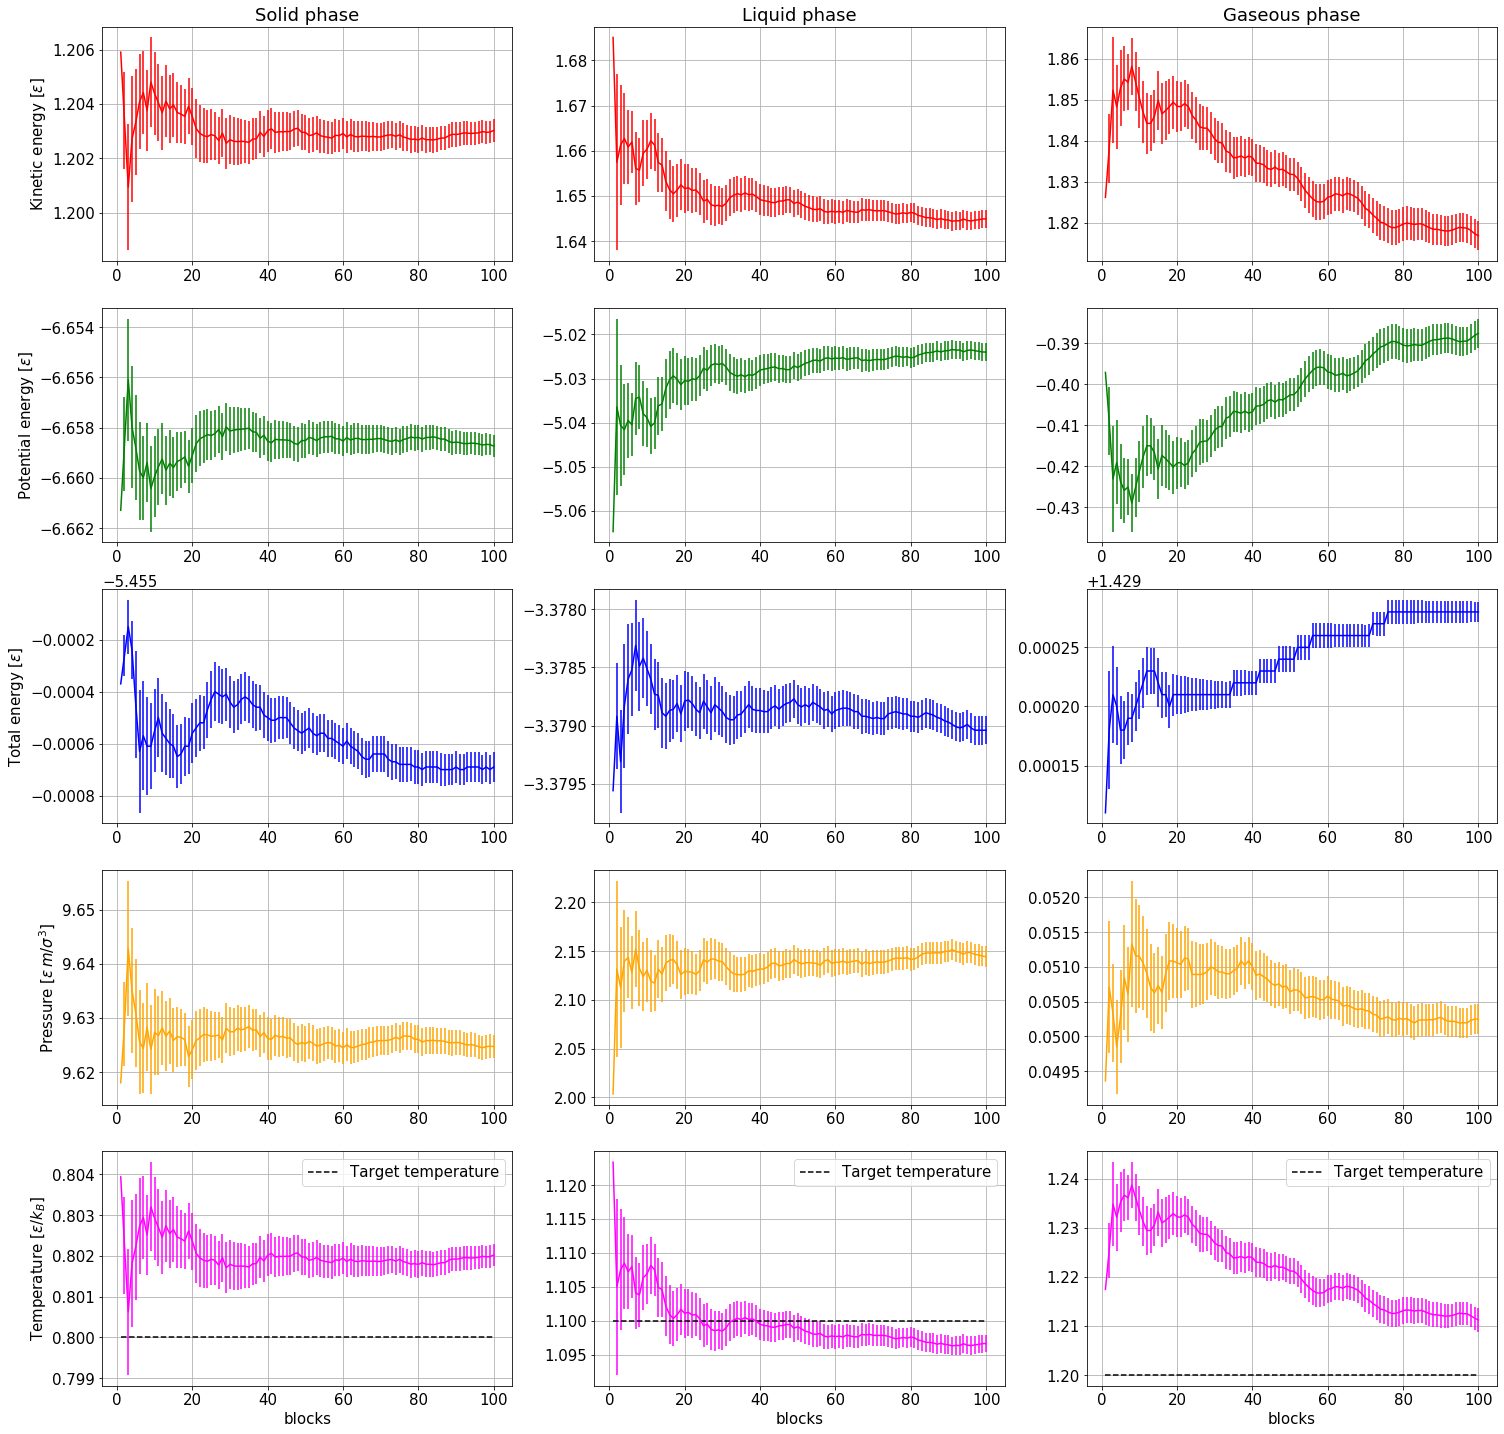

On the last block
       solid               liquid              gas
k:     1.20303±0.00041     1.64496±0.00196     1.81687±0.00357
u:    -6.65873±0.00043    -5.02400±0.00199    -0.38759±0.00357
e:    -5.45569±0.00006    -3.37904±0.00012     1.42928±0.00001
P:     9.62474±0.00216     2.14430±0.01068     0.05025±0.00021
T:     0.80202±0.00027     1.09664±0.00131     1.21125±0.00238

where k==K/N, u==U/N and e==E/N


In [4]:
obs = ["ekin", "epot", "etot", "press", "temp"]
labels = [r"Kinetic energy [$\epsilon$]", r"Potential energy [$\epsilon$]", r"Total energy [$\epsilon$]", 
          r"Pressure [$\epsilon\,m/\sigma^3$]", r"Temperature [$\epsilon/k_B$]"]
colors = ["red", "green", "blue", "orange", "magenta"]
titles = ["Solid", "Liquid", "Gaseous"]
T_teos = [0.8, 1.1, 1.2]

# plotting
fig = plt.figure(figsize=(25, 25))

for i in range(5):
    ob = obs[i]
    label = labels[i]
    color = colors[i]
        
    for j in range(3):

        title = titles[j]
        state = states[j]
        df = dfs[state]
        blocks = df["ekin"]["Block"]

        ax = fig.add_subplot(5, 3, 3*i + j + 1)
        ax.errorbar(blocks, df[ob]["Prog_mean"], yerr=df[ob]["Error"], color=color)
        if ob == "temp": 
            ax.plot(blocks, np.ones(len(blocks))*T_teos[j], color="black", linestyle="--", label="Target temperature")
            ax.legend()

        if i == 0: ax.set_title(f"{title} phase")
        if i == 4: ax.set_xlabel("blocks")
        if j == 0: ax.set_ylabel(label)
            
        ax.grid(True)

plt.show()
        
# printing
print_labels = ["k", "u", "e", "P", "T"]
print("On the last block")
print("       solid               liquid              gas")
for i in range(len(obs)):
    ob = obs[i]
    print_label = print_labels[i]
    
    solid_val = f"{format(dfs['solid'][ob]['Prog_mean'][99], '.5f')}±{format(dfs['solid'][ob]['Error'][99], '.5f')}"
    liquid_val = f"{format(dfs['liquid'][ob]['Prog_mean'][99], '.5f')}±{format(dfs['liquid'][ob]['Error'][99], '.5f')}"
    gas_val = f"{format(dfs['gas'][ob]['Prog_mean'][99], '.5f')}±{format(dfs['gas'][ob]['Error'][99], '.5f')}"
    
    if ob == "epot":
        print(f"{print_label}:    {solid_val}    {liquid_val}    {gas_val}")
    elif ob == "etot":
        print(f"{print_label}:    {solid_val}    {liquid_val}     {gas_val}")
    else:
        print(f"{print_label}:     {solid_val}     {liquid_val}     {gas_val}")

print("\nwhere k==K/N, u==U/N and e==E/N")

We can see that, in both the solid phase and the liquid one, the measured quantities stabilize after approximately $\approx 40$-$60$ blocks. In the gaseous stage, instead, every observable starts converging only after $\approx 80$ blocks.

Moreover, it seems that the total internal energy error is smaller than the kinetic energy and the internal energy ones by approximately one order of magnitude.

Lastly, the target temperature and the system one do not coincide, but this is to be expected, as the equilibration phase was performed by hand.